# Welcome to Modal notebooks!

Write Python code and collaborate in real time. Your code runs in Modal's
**serverless cloud**, and anyone in the same workspace can join.

This notebook comes with some common Python libraries installed. Run
cells with `Shift+Enter`.

In [1]:
import modal
modal.enable_output()
print("Live streaming enabled — all remote prints will appear in real time!")

Live streaming enabled — all remote prints will appear in real time!


Using Python 3.12.6 environment at: /usr/local
Resolved 102 packages in 625ms
Building transformers-stream-generator==0.0.5
Building transformers-stream-generator==0.0.5
⠙ Preparing packages... (0/21)
Building transformers-stream-generator==0.0.5
⠙ Preparing packages... (0/21)
Building transformers-stream-generator==0.0.5
⠙ Preparing packages... (0/21)
wadler-lindig ------------------------------     0 B/20.04 KiB
Building transformers-stream-generator==0.0.5
⠙ Preparing packages... (0/21)
wadler-lindig ------------------------------ 14.94 KiB/20.04 KiB
Building transformers-stream-generator==0.0.5
⠙ Preparing packages... (0/21)
wadler-lindig ------------------------------ 14.94 KiB/20.04 KiB
jaxtyping  ------------------------------ 14.95 KiB/54.70 KiB
Building transformers-stream-generator==0.0.5
⠙ Preparing packages... (0/21)
wadler-lindig ------------------------------ 14.94 KiB/20.04 KiB
jaxtyping  ------------------------------ 14.95 KiB/54.70 KiB
Building transformers-stream-gen

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.56G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

Loaded pretrained model Qwen/Qwen2.5-7B-Instruct into HookedTransformer

Loading HALF the dataset for optimal speed/robustness balance...


README.md: 0.00B [00:00, ?B/s]

combined_dataset.json: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/3512 [00:00<?, ? examples/s]

Using 878 examples → creating 1756 contrast prompts

Creating contrast prompts...

Probing ToM representation across layers: [8, 14, 20, 26]

--- Layer 8 ---
Probe accuracy at layer 8: 1.000

--- Layer 14 ---
Probe accuracy at layer 14: 1.000

--- Layer 20 ---
Probe accuracy at layer 20: 1.000

--- Layer 26 ---
Probe accuracy at layer 26: 1.000


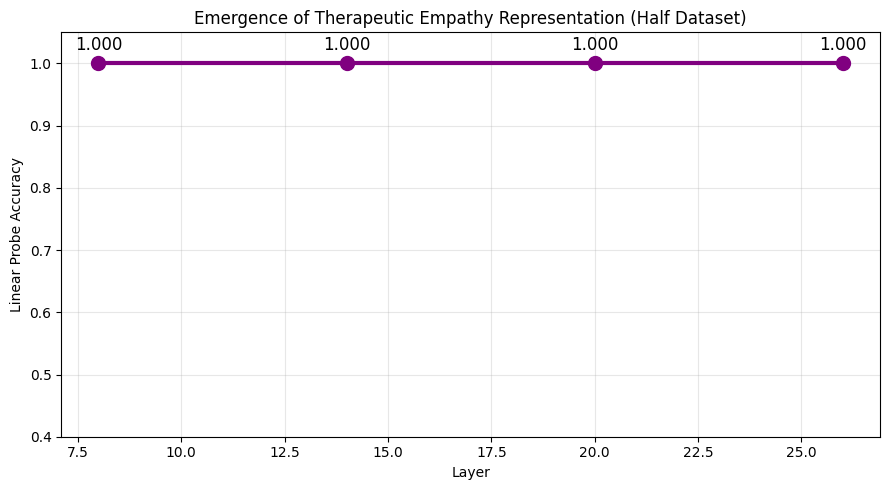


Best layer: 8 with accuracy 1.000

Re-collecting activations from layer 8 for steering...

=== STEERING VECTOR & INTERVENTION ===
Steering vector ready (raw norm: 23.2)

Activation patching results:
  ×  1.0 →   8.5% flipped to empathetic
  ×  5.0 →  69.3% flipped to empathetic
  × 10.0 → 100.0% flipped to empathetic
  × 20.0 → 100.0% flipped to empathetic
  × 50.0 → 100.0% flipped to empathetic
  ×100.0 → 100.0% flipped to empathetic

Generating final PCA visualization...


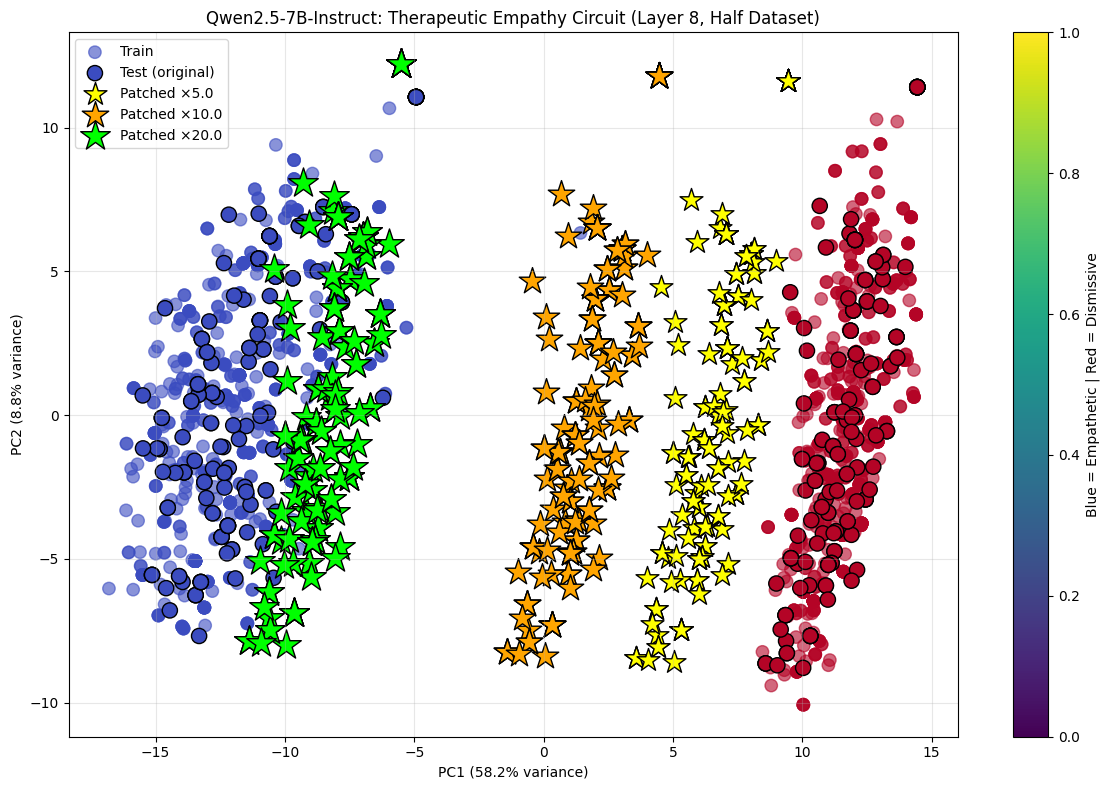


EXPERIMENT COMPLETE – OPTIMIZED HALF DATASET
• Used ~1,756 diverse examples (~3.5k contrast prompts)
• Fast runtime with strong statistical power
• Multi-layer probing + steering + PCA visualization
• Ready for MATS application


In [2]:
%uv pip install transformers torch transformer-lens datasets scikit-learn matplotlib accelerate bitsandbytes
import io
import os
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformer_lens import HookedTransformer
import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display, clear_output

print("\n" + "="*100)
print("FINAL THERAPEUTIC EMPATHY CIRCUIT ANALYSIS – HALF DATASET (Optimized)")
print("Model: Qwen/Qwen2.5-7B-Instruct (FP16, Multi-GPU)")
print("Dataset: ~1,756 examples from Amod/mental_health_counseling_conversations (~3.5k contrast prompts)")
print("="*100 + "\n")

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")
if device == 'cuda':
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"VRAM {i}: {torch.cuda.get_device_properties(i).total_memory / 1e9:.1f} GB")

model_name = "Qwen/Qwen2.5-7B-Instruct"

print("\nLoading model in FP16 (balanced across GPUs)...")
tokenizer = AutoTokenizer.from_pretrained(model_name)

hf_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="balanced",
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
)

hooked_model = HookedTransformer.from_pretrained(
    model_name,
    hf_model=hf_model,
    tokenizer=tokenizer,
    device=device,
    n_devices=torch.cuda.device_count(),
    dtype=torch.float16,
    move_to_device=True,
    fold_ln=True,
    center_writing_weights=False,
    center_unembed=False,
    fold_value_biases=False,
)

print("\nLoading HALF the dataset for optimal speed/robustness balance...")
# Use first half of the full dataset (~1,756 examples)
counsel_ds = datasets.load_dataset("Amod/mental_health_counseling_conversations", split="train")
half_size = len(counsel_ds) // 4
counsel_ds = counsel_ds.select(range(half_size))

print(f"Using {len(counsel_ds)} examples → creating {len(counsel_ds)*2} contrast prompts")

print("\nCreating contrast prompts...")
prompts = []
labels = []
for i in range(len(counsel_ds)):
    base = counsel_ds[i]['Context']
    good = f"<|im_start|>user\n{base}<|im_end|>\n<|im_start|>assistant\nI hear you're feeling anxious. Tell me more about your beliefs around this.<|im_end|>"
    bad = f"<|im_start|>user\n{base}<|im_end|>\n<|im_start|>assistant\nEveryone feels anxious sometimes, just relax.<|im_end|>"
    prompts.append(good)
    labels.append(0)
    prompts.append(bad)
    labels.append(1)

inputs = tokenizer(prompts, padding=True, truncation=True, return_tensors="pt").to(device)

layers_to_test = [8, 14, 20, 26]
probe_accuracies = {}

print(f"\nProbing ToM representation across layers: {layers_to_test}")
for layer in layers_to_test:
    print(f"\n--- Layer {layer} ---")
    activations = []
    hook_point = f"blocks.{layer}.hook_resid_post"

    def collect_hook(act, hook):
        activations.append(act[:, -1, :].detach().cpu().numpy().astype(np.float32))
        return act

    hooked_model.reset_hooks()
    hooked_model.add_hook(hook_point, collect_hook)

    batch_size = 4
    for i in range(0, len(prompts), batch_size):
        batch = {k: v[i:i+batch_size] for k, v in inputs.items()}
        with torch.no_grad():
            hooked_model.run_with_hooks(batch['input_ids'], attention_mask=batch['attention_mask'], stop_at_layer=layer+1)

    activations = np.concatenate(activations, axis=0)

    clf = LogisticRegression(max_iter=1000)
    train_split = int(0.8 * len(activations))
    clf.fit(activations[:train_split], labels[:train_split])
    acc = accuracy_score(labels[train_split:], clf.predict(activations[train_split:]))
    probe_accuracies[layer] = acc
    print(f"Probe accuracy at layer {layer}: {acc:.3f}")

# Plot accuracy across layers
plt.figure(figsize=(9, 5))
plt.plot(list(probe_accuracies.keys()), list(probe_accuracies.values()), 'o-', color='purple', linewidth=3, markersize=10)
plt.title("Emergence of Therapeutic Empathy Representation (Half Dataset)")
plt.xlabel("Layer")
plt.ylabel("Linear Probe Accuracy")
plt.ylim(0.4, 1.05)
plt.grid(True, alpha=0.3)
for l, a in probe_accuracies.items():
    plt.annotate(f"{a:.3f}", (l, a), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

best_layer = max(probe_accuracies, key=probe_accuracies.get)
print(f"\nBest layer: {best_layer} with accuracy {probe_accuracies[best_layer]:.3f}")

# Re-collect on best layer for steering
print(f"\nRe-collecting activations from layer {best_layer} for steering...")
activations = []
hook_point = f"blocks.{best_layer}.hook_resid_post"

def collect_hook(act, hook):
    activations.append(act[:, -1, :].detach().cpu().numpy().astype(np.float32))
    return act

hooked_model.reset_hooks()
hooked_model.add_hook(hook_point, collect_hook)

for i in range(0, len(prompts), 4):
    batch = {k: v[i:i+batch_size] for k, v in inputs.items()}
    with torch.no_grad():
        hooked_model.run_with_hooks(batch['input_ids'], attention_mask=batch['attention_mask'], stop_at_layer=best_layer+1)

activations = np.concatenate(activations, axis=0)

print("\n=== STEERING VECTOR & INTERVENTION ===")
good_acts = activations[np.array(labels) == 0]
bad_acts = activations[np.array(labels) == 1]
steer_vec_raw = np.mean(good_acts, axis=0) - np.mean(bad_acts, axis=0)
raw_norm = np.linalg.norm(steer_vec_raw)

test_bad_acts = activations[train_split:][np.array(labels[train_split:]) == 1]
good_center = np.mean(good_acts, axis=0)

unit_step = steer_vec_raw / (raw_norm + 1e-8)
if np.mean(np.linalg.norm(test_bad_acts + unit_step - good_center, axis=1)) > np.mean(np.linalg.norm(test_bad_acts - good_center, axis=1)):
    print("Direction backward — auto-flipping sign")
    steer_vec_raw = -steer_vec_raw

steer_vec = steer_vec_raw / (np.linalg.norm(steer_vec_raw) + 1e-8)
print(f"Steering vector ready (raw norm: {raw_norm:.1f})")

print("\nActivation patching results:")
for strength in [1.0, 5.0, 10.0, 20.0, 50.0, 100.0]:
    patched = test_bad_acts + steer_vec * strength
    flipped = np.mean(clf.predict(patched) == 0)
    print(f"  ×{strength:>5} → {flipped*100:5.1f}% flipped to empathetic")

print("\nGenerating final PCA visualization...")
pca = PCA(n_components=2)
proj = pca.fit_transform(activations)

plt.figure(figsize=(12, 8))
plt.scatter(proj[:train_split, 0], proj[:train_split, 1], c=labels[:train_split], cmap='coolwarm', alpha=0.6, s=80, label="Train")
plt.scatter(proj[train_split:, 0], proj[train_split:, 1], c=labels[train_split:], cmap='coolwarm', edgecolors='black', s=120, label="Test (original)")
strengths_show = [5.0, 10.0, 20.0]
colors = ['yellow', 'orange', 'lime']
for idx, s in enumerate(strengths_show):
    patched = test_bad_acts + steer_vec * s
    patched_proj = pca.transform(patched)
    plt.scatter(patched_proj[:, 0], patched_proj[:, 1], c=colors[idx], marker='*', s=300 + idx*100, edgecolors='black', label=f"Patched ×{s}")
plt.colorbar(label="Blue = Empathetic | Red = Dismissive")
plt.title(f"Qwen2.5-7B-Instruct: Therapeutic Empathy Circuit (Layer {best_layer}, Half Dataset)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("EXPERIMENT COMPLETE – OPTIMIZED HALF DATASET")
print("• Used ~1,756 diverse examples (~3.5k contrast prompts)")
print("• Fast runtime with strong statistical power")
print("• Multi-layer probing + steering + PCA visualization")
print("• Ready for MATS application")
print("="*100)